In [125]:
import pandas as pd
import numpy as np

In [226]:
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm#日本語のタイトルを使用する際に使用
%matplotlib inline

In [227]:
#警告文容を出力しないようにする
import warnings
warnings.simplefilter('ignore')

In [228]:
#基本的には3つのcsvファイルを用いてやっていく

train = pd.read_csv('../1.sample_dataset/train.csv')
test = pd.read_csv('../1.sample_dataset/test.csv')
sample_submission = pd.read_csv('../1.sample_dataset/sample_submission.csv')

In [229]:
train.head()

,ID,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,3,1,3,female,26.0,0,0,7.9250,S
2,4,1,1,female,35.0,1,0,53.1000,S
3,5,0,3,male,35.0,0,0,8.0500,S
4,7,0,1,male,54.0,0,0,51.8625,S


In [230]:
train.shape# データの大きさを確認する

(668, 9)

In [231]:
train.info()#データの情報を確認する
#カラムの詳細がわかる

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        668 non-null    int64  
 1   survived  668 non-null    int64  
 2   pclass    668 non-null    int64  
 3   sex       668 non-null    object 
 4   age       535 non-null    float64
 5   sibsp     668 non-null    int64  
 6   parch     668 non-null    int64  
 7   fare      668 non-null    float64
 8   embarked  666 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 47.1+ KB


In [232]:
test.head()

,ID,pclass,sex,age,sibsp,parch,fare,embarked
0,2,1,female,38.0,1,0,71.2833,C
1,6,3,male,NaN,0,0,8.4583,Q
2,9,3,female,27.0,0,2,11.1333,S
3,11,3,female,4.0,1,1,16.7000,S
4,15,3,female,14.0,0,0,7.8542,S


In [233]:
test.shape

(223, 8)

In [234]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        223 non-null    int64  
 1   pclass    223 non-null    int64  
 2   sex       223 non-null    object 
 3   age       179 non-null    float64
 4   sibsp     223 non-null    int64  
 5   parch     223 non-null    int64  
 6   fare      223 non-null    float64
 7   embarked  223 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 14.1+ KB


In [235]:
sample_submission.head()

,ID,survived
0,2,0
1,6,0
2,9,0
3,11,0
4,15,0


In [236]:
train.dtypes

ID            int64
survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [237]:
#欠損値の確認
train.isnull().sum()

ID            0
survived      0
pclass        0
sex           0
age         133
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [238]:
test.isnull().sum()

ID           0
pclass       0
sex          0
age         44
sibsp        0
parch        0
fare         0
embarked     0
dtype: int64

In [239]:
#describe
#pandasのdescribeメソッドを使用すると、各列についてデータを要約することができる
#こちらを用いると、数値から外れ値を見つけることができる
#引数ない場合でも実行可能
train.describe(include="all")

#引数に「」を渡すと「Object」の集計ができる
#train.describe(include="O")


,ID,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,668.000000,668.000000,668.000000,668,535.000000,668.000000,668.000000,668.000000,666
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,437,NaN,NaN,NaN,NaN,490
mean,445.911677,0.386228,2.305389,NaN,29.900000,0.534431,0.392216,32.373621,NaN
std,259.966783,0.487249,0.837377,NaN,14.487993,1.161739,0.822509,50.632021,NaN
min,1.000000,0.000000,1.000000,NaN,0.670000,0.000000,0.000000,0.000000,NaN
25%,216.250000,0.000000,2.000000,NaN,21.000000,0.000000,0.000000,7.925000,NaN
50%,445.500000,0.000000,3.000000,NaN,29.000000,0.000000,0.000000,14.500000,NaN
75%,674.500000,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.275000,NaN


In [240]:
#IDとsurvivedを省いて、trainのデータを要約します。
train.iloc[:,2:].describe(include="all")

,pclass,sex,age,sibsp,parch,fare,embarked
count,668.000000,668,535.000000,668.000000,668.000000,668.000000,666
unique,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,437,NaN,NaN,NaN,NaN,490
mean,2.305389,NaN,29.900000,0.534431,0.392216,32.373621,NaN
std,0.837377,NaN,14.487993,1.161739,0.822509,50.632021,NaN
min,1.000000,NaN,0.670000,0.000000,0.000000,0.000000,NaN
25%,2.000000,NaN,21.000000,0.000000,0.000000,7.925000,NaN
50%,3.000000,NaN,29.000000,0.000000,0.000000,14.500000,NaN
75%,3.000000,NaN,38.000000,1.000000,0.000000,31.275000,NaN


In [241]:
# testのデータを要約。includeの引数ん際は数値のみ、"O"はobjectのみ、"all"は全てのデータを要約します。
test.iloc[:,1:].describe(include="all")

,pclass,sex,age,sibsp,parch,fare,embarked
count,223.000000,223,179.000000,223.000000,223.000000,223.000000,223
unique,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,140,NaN,NaN,NaN,NaN,154
mean,2.318386,NaN,29.098715,0.488789,0.349776,31.696729,NaN
std,0.833949,NaN,14.665346,0.904747,0.755513,46.875335,NaN
min,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,2.000000,NaN,19.000000,0.000000,0.000000,7.895800,NaN
50%,3.000000,NaN,26.000000,0.000000,0.000000,13.000000,NaN
75%,3.000000,NaN,38.000000,1.000000,0.000000,30.000000,NaN


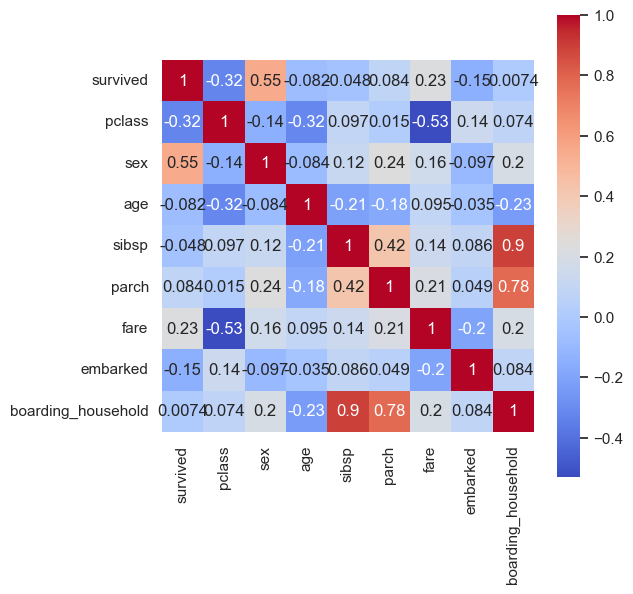

In [273]:
#相関関係を確認
# ヒートマップを使って相関関係を可視化
#なぜか描画できない
plt.figure(figsize=(6,6))
sns.heatmap(train.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [ ]:
#ペアプロットを使用することでグラフの相関関係を見ることもできる
sns.pairplot(train)
plt.show()

In [ ]:
#個々の相関を見たい場合は散布図や線形回帰プロット
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.scatterplot(x='age', y='fare', data=train, ax=ax[0], hue='survived')
ax[0].set_title('Scatterplot of age and fare in the train')

sns.regplot(x='age', y='fare', data=train, ax=ax[1], color='green')
ax[1].set_title('Regplot of age and fare in the train')

ax[0].legend(title="survived")
ax[1].legend(labels=["regplot"])
plt.show()

### 手順3 :　　探索的データ分析と特徴量エンジニアリング

#### 1.survivedについて

In [ ]:
#trainにあるsurvivedのデータ量を可視化する
sns.countplot(x='survived', data=train)
plt.show()

In [243]:
#trainにあるsurvivedの割合を数値で可視化する
train["survived"].value_counts() / len(train["survived"]) * 100

survived
0    61.377246
1    38.622754
Name: count, dtype: float64

### 2.sexについて

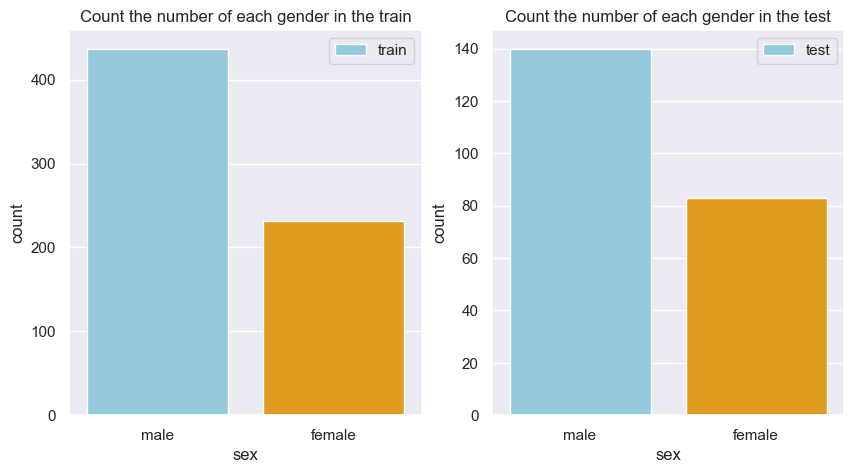

In [244]:
#trainとtestにあるsexのデータ量を確認する
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot(x='sex', data=train, ax=ax[0], palette={'male':'skyblue', 'female':'orange'}, order=['male', 'female'])
ax[0].set_title('Count the number of each gender in the train')

sns.countplot(x='sex', data=test, ax=ax[1], palette={'male':'skyblue', 'female':'orange'}, order=['male', 'female'])
ax[1].set_title('Count the number of each gender in the test')

ax[0].legend(labels=["train"])
ax[1].legend(labels=["test"])
plt.show()



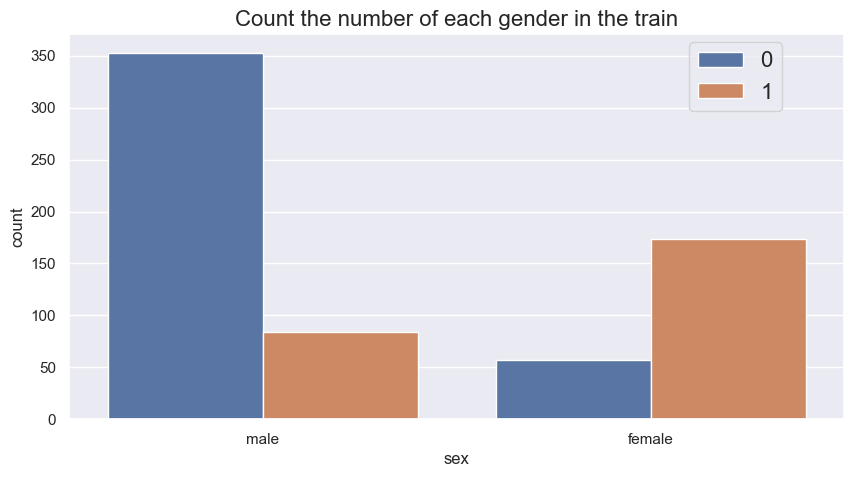

In [245]:
#trainにあるsexごとにsurvivedがどのようになっているかを可視化する
fig, ax = plt.subplots(figsize=(10,5)) #add this line

sns.countplot(x='sex', data=train, hue='survived', 
             order=['male','female'],ax=ax) #Add "ax=ax" here

ax.set_title('Count the number of each gender in the train', fontsize=16)# Use "ax.set_title" instead of "sns.set_title"

plt.legend(loc=[0.8, 0.8], fontsize=16)
plt.show()

### 3.ageについて

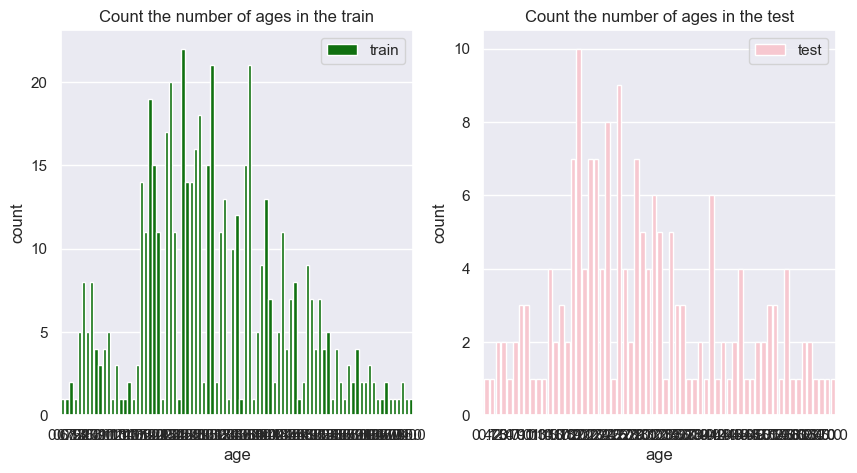

In [246]:
# trainとtestにあるageのデータ量を可視化する
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='age', data=train, ax=ax[0], color='green')
ax[0].set_title('Count the number of ages in the train')

sns.countplot(x='age', data=test, ax=ax[1], color="pink")
ax[1].set_title('Count the number of ages in the test')

ax[0].legend(labels=["train"])
ax[1].legend(labels=["test"])
plt.show()

In [247]:
#このグラフではよくわからないので、
#年齢を5歳区切りのカテゴリごとに分けて可視化
train['age_period'] = pd.cut(train['age'], bins=range(0,90,5), right=False)
train['age_period'] = pd.cut(test['age'], bins=range(0,90,5), right=False)

ValueError: Could not interpret value `age_period` for `x`. An entry with this name does not appear in `data`.

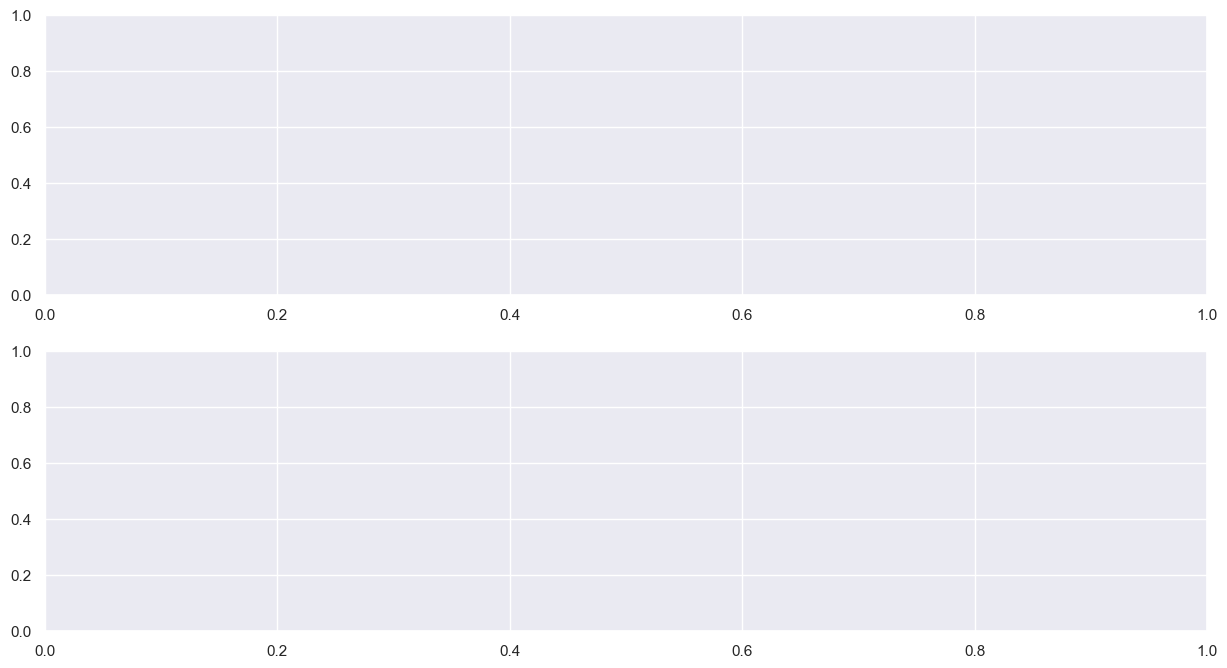

In [276]:
#年齢を5歳区切りのカテゴリに分けて可視化
#test データに age_period という列が存在していないためにエラー発生
fig,ax = plt.subplots(2,1,figsize=(15,8))
sns.countplot(x='age_period', data=train, ax=ax[0],color="green")
ax[0].set_title('Count the number of ages in the train')
ax[0].set_ylim(0,100)

sns.countplot(x='age_period',data=test, ax=ax[1], color="pink")
ax[1].set_title('Count the number of ages in the test')
ax[1].set_ylim(0,100)

ax[0].legend(labels=["train"])
ax[1].legend(labels=["test"])

plt.tight_layout()
plt.shwo()

In [ ]:
#年齢と生存の有無に関係性はあるのかを調べる
fig, ax = plt.subplots(1,2, figsize=(12,6))

sns.histplot(train[train["survived"]==0]["age"],label="survived", color="orange", ax=ax[0])
ax[0].set_title('Count the number of passengers who did not survive')

sns.histplot(train[train["survived"]==1]["age"],label="Dead", color="b", ax=ax[1])
ax[1].set_title('Count the number of passengers who did not survive')

ax[0].legend(labels=["0:dead"])
ax[1].legend(labels=["1:survived"])
plt.show()

In [ ]:
#欠損値の割合
print(f'trainの欠損値の割合は{round(train['age'].isnull().sum() / len(train["age"]) * 100 ,2)}%です。')
print(f'testの欠損値の割合は{round(test['age'].isnull().sum() / len(test["age"]) * 100 ,2)}%です。')


In [ ]:
#欠損値を補完する
train['age'] = train['age'].fillna(train['age'].mean())
test['age'] = test['age'].fillna(test['age'].mean())

print(train['age'].isnull().sum())

### 4.pclass

#### 客室と生存の有無に関係性はあるのか？を調べる

In [ ]:
#countplotで可視化する
fig,ax = plt.subplots(figsize=(12,6))
sns.countplot(x="pclass",hue="survived",data=train)
plt.show()

### 5.fareについて

#### 生存の有無に関係性はあるのかを調べる

In [ ]:
# histplotで可視化する
fig,ax = plt.subplots(1,2,figsize=(10,4))

sns.histplot(x='fare', data=train, ax=ax[0],hue='survived')
ax[0].set_title('Histplot of fare in the train')

sns.histplot(x='fare', data=test, ax=ax[1],color='orange')
ax[1].set_title('Histplot of fare in the test')

plt.tight_layout()
plt.show()

### 6.sibsp(一緒に乗船した兄弟または配偶者の数)について

#### 生存の有無に関係性はあるのか？を調べる

In [ ]:
#countplotで可視化
fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.countplot(x='sibsp', data=train, hue='survived', ax=ax[0])
ax[0].set_title('Countplot of sibsp in the train')

sns.countplot(x='sibsp',data=test, ax=ax[1])
ax[1].set_title('Countplot of sibsp in the test')

plt.show()

### 7.parch(一緒に乗船した親または子供の数)について

#### 生存の有無に関係性はあるのかを調べる

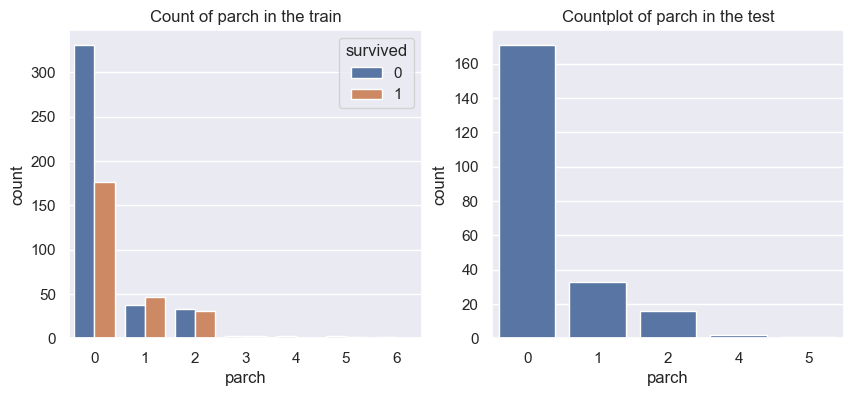

In [249]:
#countplotで可視化する
fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.countplot(x='parch', data=train, hue='survived', ax=ax[0])
ax[0].set_title('Count of parch in the train')

sns.countplot(x='parch', data=test, ax=ax[1])
ax[1].set_title('Countplot of parch in the test')
plt.show()

In [250]:
#これらの2つの特性を組み合わせることで、各乗客が乗船時にどの程度の家族と一緒にいたかを知ることができ
train['sibsp'] + train['parch']

0      1
1      0
2      1
3      0
4      0
      ..
663    0
664    5
665    0
666    3
667    0
Length: 668, dtype: int64

In [251]:
train['boarding_household'] = train['sibsp'] + train['parch'] + 1
test['boarding_household'] = test['sibsp'] + test['parch'] + 1
train.head()

,ID,survived,pclass,sex,age,sibsp,parch,fare,embarked,age_period,boarding_household
0,1,0,3,male,22.0,1,0,7.2500,S,"[35.0, 40.0)",2
1,3,1,3,female,26.0,0,0,7.9250,S,NaN,1
2,4,1,1,female,35.0,1,0,53.1000,S,"[25.0, 30.0)",2
3,5,0,3,male,35.0,0,0,8.0500,S,"[0.0, 5.0)",1
4,7,0,1,male,54.0,0,0,51.8625,S,"[10.0, 15.0)",1


### 8.embarkedについて

#### 生存の有無に関係性はあるのかを調べる

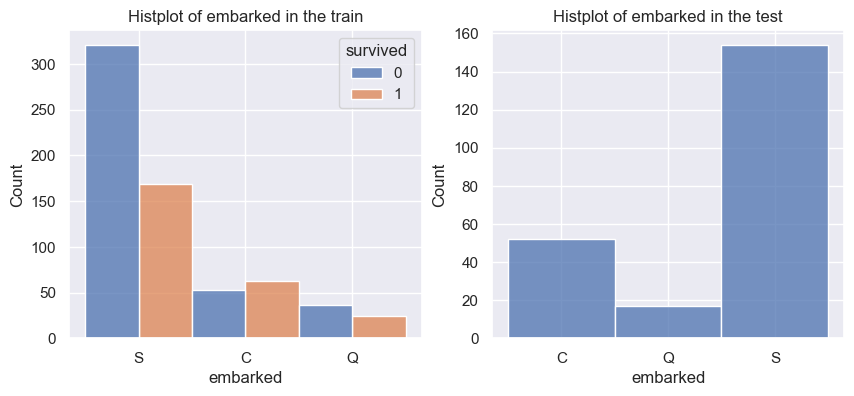

In [252]:
# histplotで可視化する
fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.histplot(x='embarked', data=train, hue='survived', ax=ax[0], multiple='dodge')
ax[0].set_title('Histplot of embarked in the train')

sns.histplot(x='embarked', data=test, ax=ax[1])
ax[1].set_title('Histplot of embarked in the test')

plt.show()

In [253]:
#欠損値の数を確認
print(train['embarked'].isnull().sum())
#欠損値の割合を算出
print(f'欠損値は全体の{round(train["embarked"].isnull().sum()/len(train["embarked"])*200,2)}%である')

2
欠損値は全体の0.6%である


In [254]:
import numpy as np
import pandas as pd

#データの読み込み
train = pd.read_csv('../1.sample_dataset/train.csv')
test = pd.read_csv('../1.sample_dataset/test.csv')

#sex
# 0と1の数値データに置き換える
train['sex'].replace({"male":0, "female":1},inplace=True)
test['sex'].replace({"male":0, "female":1},inplace=True)

#age
# 機械学習モデルに当てはめられ右葉欠損は平均値で埋める
train['age'] = train['age'].fillna(train['age'].mean())
test['age'] = test['age'].fillna(test['age'].mean())

# pclassは処理なし

# fareは処理なし

# sibspは処理なし

# parchは処理なし

# parchとsibspで新しい特徴量を作成する
train['boarding_household'] = train['sibsp'] + train['parch'] + 1 
test['boarding_household'] = test['sibsp'] + test['parch'] + 1 

# embarkedの欠損をデータから削除
train.dropna(subset=["embarked"], inplace=True)
test.dropna(subset=["embarked"],inplace=True)

# embarkedを文字列から数値データにする
# ラベルエンコードするためのライブラリをインポート
from sklearn.preprocessing import LabelEncoder

# Embarked列を数値データに変換するためのLabelEncodeerを作成(生成)
label_encoder = LabelEncoder()

#  LabelEncoderを使って、Embarked列を数値データに変換
train['embarked'] = label_encoder.fit_transform(train['embarked'])
test['embarked'] = label_encoder.fit_transform(test['embarked'])


In [255]:
train.head()

,ID,survived,pclass,sex,age,sibsp,parch,fare,embarked,boarding_household
0,1,0,3,0,22.0,1,0,7.2500,2,2
1,3,1,3,1,26.0,0,0,7.9250,2,1
2,4,1,1,1,35.0,1,0,53.1000,2,2
3,5,0,3,0,35.0,0,0,8.0500,2,1
4,7,0,1,0,54.0,0,0,51.8625,2,1


In [256]:
train.shape

(666, 10)

In [257]:
# 欠損値はない
train.isnull().sum()

ID                    0
survived              0
pclass                0
sex                   0
age                   0
sibsp                 0
parch                 0
fare                  0
embarked              0
boarding_household    0
dtype: int64

In [258]:
# 欠損値はない
test.isnull().sum()

ID                    0
pclass                0
sex                   0
age                   0
sibsp                 0
parch                 0
fare                  0
embarked              0
boarding_household    0
dtype: int64

# 手順4:モデルとモデルの評価

#### 重回帰モデルを使用して実装する
#### 目的変数と説明変数を分割する

In [259]:
# "ID"をindexとして指定する
train = train.set_index("ID")
test = test.set_index("ID")


#説明変数として使わない「survived」を削除する
X = train.drop('survived', axis=1)
# 目的変数に「survived」を指定する
y = train['survived']


In [260]:
X

,pclass,sex,age,sibsp,parch,fare,embarked,boarding_household
ID,,,,,,,,
1,3,0,22.0,1,0,7.2500,2,2
3,3,1,26.0,0,0,7.9250,2,1
4,1,1,35.0,1,0,53.1000,2,2
5,3,0,35.0,0,0,8.0500,2,1
7,1,0,54.0,0,0,51.8625,2,1
...,...,...,...,...,...,...,...,...
885,3,0,25.0,0,0,7.0500,2,1
886,3,1,39.0,0,5,29.1250,1,6
887,2,0,27.0,0,0,13.0000,2,1


In [261]:
#重回帰モデル構築
from sklearn.linear_model import LinearRegression

#重回帰モデルを作成(インスタンスの生成)
model = LinearRegression()

#モデルの学習
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


##### 上記の3行のコードで、機械学習モデルの構築は終わり
##### testデータの予測

In [262]:
#予測値を出力
#予測値は、確率で表されている
pred = model.predict(test)
pred

array([ 9.25673981e-01,  1.46074460e-01,  6.18156548e-01,  7.18267409e-01,
        7.11812217e-01,  5.70641587e-01,  3.91307149e-01,  4.34710188e-01,
        9.95920047e-01,  4.73321731e-01,  1.57804551e-01,  7.38739471e-01,
        5.16123927e-01,  1.10621186e-01,  5.93110641e-02,  2.88072332e-01,
        4.29415547e-01,  2.22484912e-01,  3.03890948e-01,  1.34402673e-01,
        1.10621186e-01,  6.19724975e-01,  4.69248932e-01,  5.33102665e-01,
        1.10583502e-01,  8.80398364e-02,  6.32730082e-01,  2.78329143e-01,
        6.77641385e-01,  6.65178504e-01,  6.10898377e-01,  3.32168770e-01,
        2.78546559e-01,  1.40160242e-01,  7.35484100e-01,  1.10770872e-01,
        1.28607190e-01,  4.54059307e-01,  7.34385085e-01,  1.21267896e-01,
        3.39081861e-01,  3.69135918e-01,  1.45901362e-01,  1.17376692e-01,
        8.16863252e-02,  1.75282644e-01,  1.40082073e-01,  1.01293779e-01,
        9.76718333e-01, -1.69763787e-02,  8.75424558e-01,  1.11129097e-01,
        1.39627962e-01,  

In [263]:
#予測値の最初の値を取得
print(pred[0])

0.9256739811130266


##### これは予測値(予測値)が1である確率を表している
##### pred[0]は0.925である
##### およそ0.9の確率で1であるということ
##### 問題は0か1を予測する2値分類
##### 閾値を0.5として結果を振り分けよう

In [264]:
#id2の人が生存した確率は92%だということがわかる
test.head(1)

,pclass,sex,age,sibsp,parch,fare,embarked,boarding_household
ID,,,,,,,,
2,1,1,38.0,1,0,71.2833,0,2


In [265]:
# 提出用のデータを読み込みます
sample_submission = pd.read_csv('../1.sample_dataset/sample_submission.csv')

# 予測する列に予測値を代入します。
sample_submission['survived'] = pred

# 閾値0.5で0と1に振り分けます
sample_submission['survived'] = sample_submission['survived'].apply(lambda x: 1 if x >= 0.5 else 0)
sample_submission.head()

,ID,survived
0,2,1
1,6,0
2,9,1
3,11,1
4,15,1


##### 予測した値を実際に提出してみる

In [266]:
#index列は必要がないので、Falseを指定する
#index=Falseを指定しなければ3行の出力になってしまう(idと目的変数飲みの出力にしたい為削除)
sample_submission.to_csv('submission.scv', index=False)

##### キノクエストに提出すると0.7775(77.7%)だった
##### どの特徴が目的変数に影響を与えているかを可視化できます。

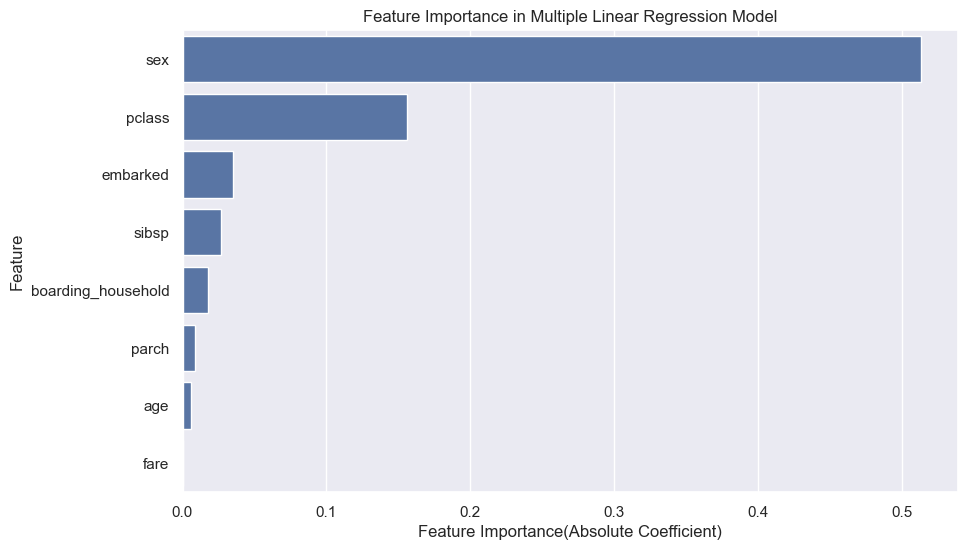

In [267]:
# 各特徴の重要度(係数の絶対値)を取得
feature_importance = abs(model.coef_)

# 重要度を降順にしてソートソテインデックスを取得
sorted_indices = np.argsort(feature_importance)[::-1]

# 特徴の重要度を降順にソート
sorted_importance = feature_importance[sorted_indices]

# 特徴の名前を降順にソート
sorted_features = X.columns[sorted_indices]

# 特徴の重要度を可視化
plt.figure(figsize=(10,6))
sns.barplot(x=sorted_importance, y=sorted_features)
plt.xlabel('Feature Importance(Absolute Coefficient)')
plt.ylabel('Feature')
plt.title('Feature Importance in Multiple Linear Regression Model')
plt.show()

##### 数値でも見ることができる

In [268]:
# 各特徴の計数を取得
coefficients = pd.Series(model.coef_,index=X.columns)

# 結果を表示
print("各特徴の計数:")
print(coefficients)

各特徴の計数:
pclass               -0.156043
sex                   0.513273
age                  -0.005826
sibsp                -0.026619
parch                 0.008630
fare                  0.000244
embarked             -0.035353
boarding_household   -0.017989
dtype: float64


In [269]:
# 自分で作成したモデルの性能を評価する(検証する)
# 検証方法は代表的なものとして2つある

#ホールドアウト法：トレーニングデータとテストデータに分割する方法

from sklearn.model_selection import train_test_split

# データをトレーニングデータとテストデータに分割
#　test_sizeでテストデータを割合を指定できる(例：0.2ならば、20%がテストデータになる)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, shuffle=True)

# 分割結果を確認
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))
print("X_train:", X_train)
print("y_train:", y_train)
print("X_test:", X_test)
print("y_test:", y_test)


532 532
134 134
X_train:      pclass  sex   age  sibsp  parch     fare  embarked  boarding_household
ID                                                                         
315       2    0  43.0      1      1  26.2500         2                   3
537       1    0  45.0      0      0  26.5500         2                   1
372       3    0  18.0      1      0   6.4958         2                   2
85        2    1  17.0      0      0  10.5000         2                   1
188       1    0  45.0      0      0  26.5500         2                   1
..      ...  ...   ...    ...    ...      ...       ...                 ...
96        3    0  29.9      0      0   8.0500         2                   1
136       2    0  23.0      0      0  15.0458         0                   1
362       2    0  29.0      1      0  27.7208         0                   2
583       2    0  54.0      0      0  26.0000         2                   1
132       3    0  20.0      0      0   7.0500         2        

In [270]:
X_test

,pclass,sex,age,sibsp,parch,fare,embarked,boarding_household
ID,,,,,,,,
826,3,0,29.9,0,0,6.9500,1,1
206,3,1,2.0,0,1,10.4625,2,2
852,3,0,74.0,0,0,7.7750,2,1
316,3,1,26.0,0,0,7.8542,2,1
689,3,0,18.0,0,0,7.7958,2,1
...,...,...,...,...,...,...,...,...
722,3,0,17.0,1,0,7.0542,2,2
559,1,1,39.0,1,1,79.6500,2,3
621,3,0,27.0,1,0,14.4542,0,2


In [271]:
#sklearnのaccuracy_scoreを用いて、モデルの性能を評価する

from sklearn.metrics import accuracy_score

model = LinearRegression()
model.fit(X_train, y_train)

# テストデータを使用して予測
y_pred = model.predict(X_test)

# 閾値0.5を使用して0または1に振り分け
y_pred = np.where(y_pred >= 0.5, 1, 0)

# AUCスコアの計算
accuracy = accuracy_score(y_test.to_numpy(), y_pred)
print('Accuracy score:', accuracy)

Accuracy score: 0.8283582089552238


In [272]:
#モデルを使用して予測
pred = model.predict(test)

# 提出用のデータを読み込みます
sample_submission = pd.read_csv('../1.sample_dataset/sample_submission.csv')

#予測する列に予測値を代入
sample_submission['survived'] = pred

# 閾値0.5で0と1に振り分けます
sample_submission['survived'] = sample_submission['survived'].apply(lambda x: 1 if x >= 0.5 else 0)
sample_submission.head()

#csvの出力
# index列は必要がないので、falseを指定します。
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head()

,ID,survived
0,2,1
1,6,0
2,9,1
3,11,1
4,15,1


##### モデルの性能を評価するとaccuracyは0.82835だった
##### このモデルを使用して、提出すると0.78923でした
##### これは誤差の大きい範囲が大きいので、モデルは過学習をしていると言えるでしょう
##### 下記によく使用する評価指標の計算方法を書いておきます。

In [278]:
# 誤差の二乗平均の平方根(rmse)の計算
# 値が0に近づくほど良い
import numpy as np
from sklearn.metrics import mean_squared_error

# 予測値と実際の値(サンプルデータとしてランダムに生成)
y_train = np.array([2.0, 2.8, 4.0, 4.9, 5.2])
y_pred = np.array([2.5, 3.0, 4.2, 5.1, 4.9])

# RRMSEの計算
rmse = np.sqrt(mean_squared_error(y_train, y_pred))

print("rmse:", rmse)

rmse: 0.30331501776206193


In [280]:
#正解率(accuracy)
# 値が1に近づくほど良いです
from sklearn.metrics import accuracy_score

# サンプルデータ(実際の値と予測値の差を示す)
y_train = [1, 0, 1, 1, 0, 1]
y_pred = [1, 1, 0, 1, 0, 0]

# accuracyの計算
accuracy = accuracy_score(y_train, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.5


In [281]:
# 適合率(precision)と再現率(recall)、F1スコア
# 値が1に近づくほど、良いです
from sklearn.metrics import precision_score, recall_score, f1_score

# サンプルデータ(実際の値と予測値を示す)
y_train = [1, 0, 1, 1, 0, 1]
y_pred = [1, 1, 0, 1, 0, 0]

# 適合率、再現率、F1スコアの計算
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

print("適合率:", precision)
print("再現率:", recall)
print("F1スコア:", f1)


適合率: 0.6666666666666666
再現率: 0.5
F1スコア: 0.5714285714285714
